Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("HR_comma_sep.csv")
dataset.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Data Exploration and Visulization

In [25]:
left = dataset[dataset.left==1]
left.shape

(1991, 10)

In [26]:
retained = dataset[dataset.left==0]
retained.shape

(10000, 10)

Average numbers for all columns

In [27]:
dataset.drop_duplicates(inplace=True)

In [29]:
dataset.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (198 vs 208)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

Impact of salary on employee retention

<Axes: xlabel='salary'>

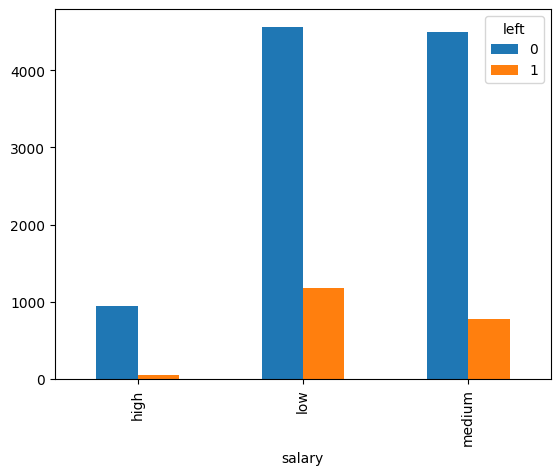

In [32]:
pd.crosstab(dataset['salary'], dataset["left"]).plot(kind="bar")

Above bar chart shows employees with high salaries are likely to not leave the company

<Axes: xlabel='Department'>

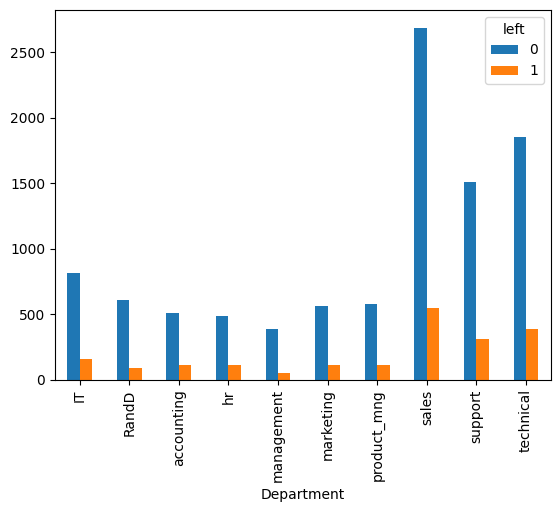

In [33]:
pd.crosstab(dataset['Department'], dataset['left']).plot(kind="bar")

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1) **Satisfaction Level**
2) **Average Monthly Hours**
3) **Promotion Last 5 Years**
4) **Salary**

In [35]:
subdf = dataset[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [37]:
salary_dummie = pd.get_dummies(dataset['salary'])
salary_dummie

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
11995,True,False,False
11996,True,False,False
11997,True,False,False
11998,True,False,False


In [39]:
salary_dummie_r = salary_dummie.replace({True :1 , False :0})
salary_dummie_r

C:\Users\prash\AppData\Local\Temp\ipykernel_5348\2854961538.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_dummie_r = salary_dummie.replace({True :1 , False :0})


,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
11995,1,0,0
11996,1,0,0
11997,1,0,0
11998,1,0,0


In [40]:
df_with_dummie = pd.concat([subdf , salary_dummie_r] , axis="columns")
df_with_dummie

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
11995,0.90,259,1,high,1,0,0
11996,0.74,266,1,high,1,0,0
11997,0.85,185,1,high,1,0,0
11998,0.33,172,1,high,1,0,0


In [42]:
df_with_dummie.drop('salary' , axis="columns" , inplace=True)

In [44]:
x = df_with_dummie
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [45]:
y = dataset['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
2119,0.50,207,0,0,1,0
6746,0.85,104,0,0,1,0
10944,0.62,193,0,1,0,0
10142,0.91,150,0,0,0,1
1707,0.43,131,0,0,0,1
...,...,...,...,...,...,...
6589,0.64,234,0,1,0,0
8879,0.85,234,0,0,0,1
382,0.45,144,0,0,0,1
7865,0.85,216,0,0,1,0


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(x_train,y_train)

C:\Users\prash\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], shape=(3598,))

In [55]:
model.score(x_test,y_test)

0.8538076709282935